<h1>Tugas Buku Hands-On Image Processing</h1>

<h4>Nama: Raditya Sebastian<br>
NIM:1306620042<br>
Kelas: Fisika A</h4>

Pada tugas ini saya akan menunjukan cara menampilkan gambar,
Melakukan proses transformasi
dan mencari nilai rgb untuk di tampilkan pada histogram

<h4>Library yang saya gunakan</h4>

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

<h4>1.Menampilkan gambar</h4><br>
untuk menampilkan gambar saya menggunakan cv2 yaitu opencv setelah itu untuk tempat penampilanya saya menggunakan matplotlib sebab kalau menggunakan cv2 harus di download gambarnya secara masing - masing oleh karena itu saya menggunakan matplotlib untuk ditampilkan dalam bentuk grafik supaya bisa di tunjukan secara langsung pada ipynb.

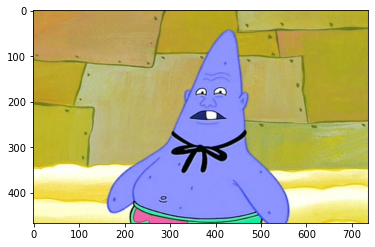

In [59]:
#Reading the picture
img = cv.imread('Raditya Sebastian_Patrick Star.jpg',1)
#showing a picture
plt.imshow(img)


Jika anda lihat warnanya sedikit berbeda dengan warna sumbernya ini dakrenakan beberapa gambar pada internet menggunakan sistem BGR(Blue,Green,Red) yang berarti warna biru dulu yang di depan array dan warna merah di belakang array. ini bisa diperbaiki menggunakan kode di bawah, kode di bawah ada kode konversi BGR ke RGB

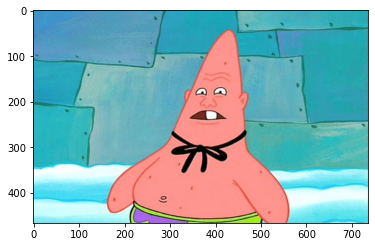

In [60]:
img_inv = cv.cvtColor(img, cv.COLOR_BGR2RGB)
Image.fromarray(img_inv).save('Raditya Sebastian_Patrick Star_rgb.jpg')
plt.imshow(img_inv)

<h3>2. Menghasilkan RGB histogram</h3>

Prinsip fungsinya saya gunakan mirip seperti buku Hand-on python
hanya di edit sedikit

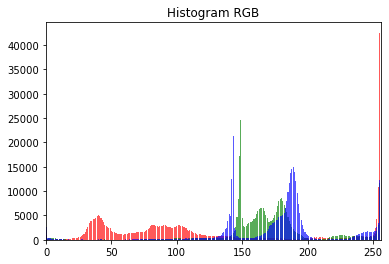

In [61]:
colors=('red','green','blue')
plt.figure()
plt.xlim([0,256])
for channel_id, color in enumerate(colors):
    
    histogram,bin_edges= np.histogram(img_inv[:,:,channel_id],bins=256,range=(0,256))
    plt.bar(bin_edges[0:-1],histogram,color=color, alpha =0.65)
    plt.title("Histogram RGB")

<h3>Affline transformasi</h3>
Affline transformasi adalah cara mengekspresikan matrix multiplikasi dan dilanjutkan dengan vektor translasi, contohnya adalah
<ol>Matrix multiplikasi</ol>
<ol>Scale Operasi</ol><br>

biasanya Affline Transformasi di representasi kan dalam matrix seperti:
$$
A =
\left[\begin{array}{cc} 
a_{00} & a_{01}\\
a_{10} & a_{11}
\end{array}\right]
\
$$<br>
$$
B =
\left[\begin{array}{cc} 
b_{00} \\ b_{10}
\end{array}\right]
\
$$
<br>
$$
M = [A B]; ~
M =
\left[\begin{array}{cc} 
a_{00} & a_{01} & b_{00}\\
a_{10} & a_{11} & b_{10}
\end{array}\right]
\
$$
Maka

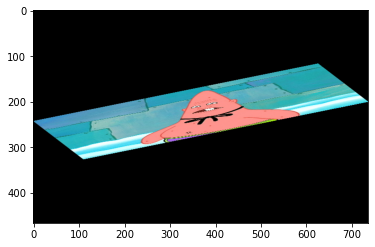

In [62]:
#menggubah gambar menjadi matrix
srcTri = np.array( [[0, 0], [img_inv.shape[1] - 1, 0], [0, img_inv.shape[0] - 1]] ).astype(np.float32)
dstTri = np.array( [[0, img_inv.shape[1]*0.33], [img_inv.shape[1]*0.85, img_inv.shape[0]*0.25], [img_inv.shape[1]*0.15, img_inv.shape[0]*0.7]] ).astype(np.float32)
warp_mat = cv.getAffineTransform(srcTri, dstTri)
#menggeserkan gambar
warp_dst = cv.warpAffine(img_inv, warp_mat, (img_inv.shape[1], img_inv.shape[0]))
#Menunjukan Gambar
plt.imshow(warp_dst)

<h3>4.Rotasi Transformasi gambar</h3>
pada opencv kita bisa mengrotasi gambar seperti yang kita lakukan pada gambar editor,hanya saja pada opencv menggunakan sistem matrix, karena gambar terdiri dari array. untuk itu kita membutuhkan matrix yang menggunakan sudut sebab untuk memutar gambar harus menggunakan sudut untuk memutarnya, maka kita gunakan matrix cos sin
$$
M =
\left[\begin{array}{cc} 
cos ~\theta & -sin ~\theta \\
sin	~\theta & cos ~\theta
\end{array}\right]
\
$$ <br>
untuk itu opencv sudah mempunyai kode yang bisa diterapkan seperti di bawah

Text(0.5, 1.0, 'gambar yang sudah di rotasi')

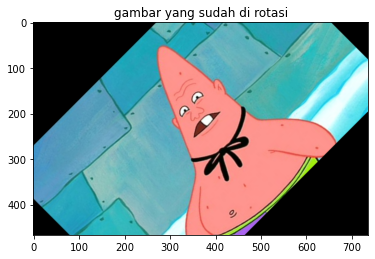

In [63]:
#Rotation Transformation
#panjang dan tinggi gambar dan tengah gambar
height, width = img_inv.shape[:2]
center = (width/2,height/2)# center adalah titik tengah gambar yang saat di putar itu adalah titik tengah yang digunakan
# use cv2.getRotationMatrix2D() ini adalah kode yang digunakan untuk membuat rotasi matrixnya
rotate_matrix = cv.getRotationMatrix2D(center=center, angle=45, scale=1)
#selanjutnya aplikasikan matrixnya pada kode berikut
rotated_image = cv.warpAffine(src=img_inv, M=rotate_matrix, dsize=(width, height))
# prosesvisualisasinya
plt.imshow(rotated_image)
plt.title('gambar yang sudah di rotasi')

<h3>5.Prespektif Transformasi</h3>
Secara singkat Prespektif transformasi itu jika kita ingin melihat salah satu tempat di gambar yang ingin kita lihat secara detail jadi bisa dibilang seperti di zoom. tentu saja itu harus memerlukan matrix yang merepresentasikan koordinat yang ingin dilihat lalu menggunakan kode opencv yang bisa membantu melihat koordinat yang dipilih

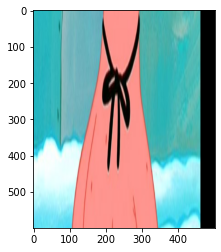

In [64]:
#Prespektif Transformation
# Mencari prespektif mana yang mau dilihat dalam gambar
pts1 = np.float32([[0, 260], [640, 260],
                    [0, 400], [640, 400]])
pts2 = np.float32([[0, 0], [400, 0],
                    [0, 640], [400, 640]])
# menerapkan prespektif algoritma
matrix = cv.getPerspectiveTransform(pts1, pts2)
result = cv.warpPerspective(img_inv, matrix, (500, 600))
plt.imshow(result)

<h3>Cermin Transformasi</h3>
pada Transformasi ini adalah menerapkan efek cermin ke dalam gambar dimana posisi gambar berubah menjadi arah berlawanan dengan arah awal

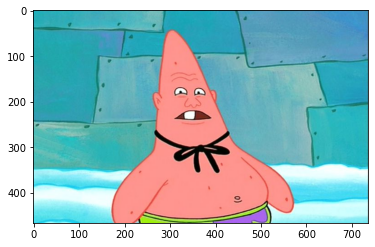

In [65]:
flipHorizontal = cv.flip(img_inv, 1)
plt.imshow(flipHorizontal)

<h3>Prosess splitting RGB</h3>
Menggunakan library opencv kita bisa memechakan warnanya menjadi 3 R,G,B dan setelah itu saya coba gabungkan untuk mengecek lagi apakah histogramnya sama atau beda?

Text(0.5, 1.0, 'Hasil pengabungan')

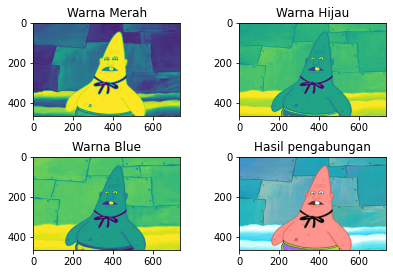

In [66]:
(R,G,B)=cv.split(img_inv)
figure, axis = plt.subplots(2, 2)
merged = cv.merge([R,G,B])
figure.tight_layout(pad=2.0)

Red_img = axis[0,0].imshow(R)
axis[0,0].set_title("Warna Merah")
Green_img = axis[0,1].imshow(G)
axis[0,1].set_title("Warna Hijau")
Blue_img = axis[1,0].imshow(B)
axis[1,0].set_title("Warna Blue")
Merged_img = axis[1,1].imshow(merged)
axis[1,1].set_title("Hasil pengabungan")

<h3>Hasil Histogram</h3>
hasil merged histogramnya mirip dengan histogram rgb sebelumnya hanya saja warnanya saya gabung untuk melihat sedikit bagaiman pixel bekerja pada dua-dimensi

Text(0.5, 1.0, 'Histogram Merged')

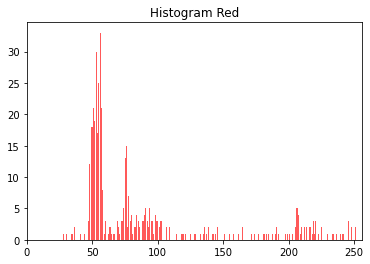

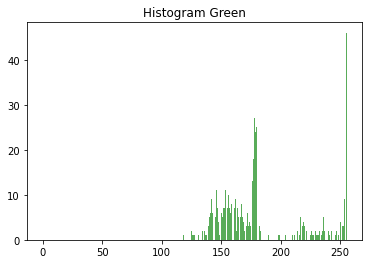

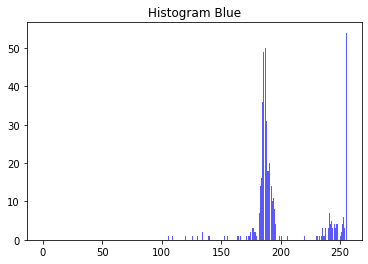

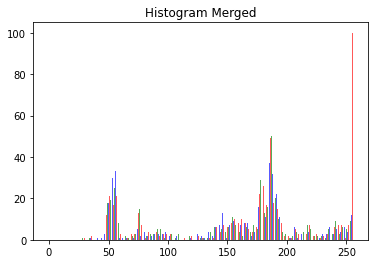

In [67]:
colors=('red')
colors_2=('green')
colors_3=('blue')
color=('red','green','blue')
plt.xlim([0,256])

    
histogram_1,bin_edges_1= np.histogram(R[:,channel_id],bins=256,range=(0,256))
plt.bar(bin_edges_1[0:-1],histogram_1,color=colors,alpha =0.65)
plt.title("Histogram Red")
plt.figure()

histogram_2,bin_edges_2= np.histogram(G[:,channel_id],bins=256,range=(0,256))
plt.bar(bin_edges_2[0:-1],histogram_2,color=colors_2, alpha =0.65)
plt.title("Histogram Green")

plt.figure()
histogram_3,bin_edges_3= np.histogram(B[:,channel_id],bins=256,range=(0,256))
plt.bar(bin_edges_3[0:-1],histogram_3,color=colors_3, alpha =0.65)
plt.title("Histogram Blue")
    
plt.figure()
histogram_4,bin_edges_4= np.histogram(merged[:,channel_id],bins=256,range=(0,256))
plt.bar(bin_edges_4[0:-1],histogram_4,color=color, alpha =0.65)
plt.title("Histogram Merged")    
